In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from xgboost import XGBRegressor

class CustomGBM:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)
        for _ in range(self.n_estimators):
            residual = y - y_pred
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residual)
            update = self.learning_rate * model.predict(X)
            y_pred += update
            self.models.append(model)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return y_pred


df = pd.read_csv('Student_performance_data _.csv')

X = df.drop(['GPA', 'GradeClass', 'StudentID'], axis=1)
y = df['GPA']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

joblib.dump(dt_model, 'decision_tree_model.pkl')

gbm = CustomGBM(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm.fit(X_train, y_train)

xgb_model = XGBRegressor(max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

joblib.dump(gbm, 'gradient_booster_model.pkl')
X_train.head(10)


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
642,18,1,0,4,18.118879,24,1,0,1,1,0,0
1752,16,1,3,2,2.469271,19,0,1,0,0,0,1
1401,17,0,2,3,3.456401,25,0,0,0,0,0,0
2032,17,1,0,1,15.838131,25,1,2,0,0,0,0
990,16,0,0,0,1.045373,19,1,2,0,0,1,0
1455,15,1,1,3,4.429871,5,1,3,1,1,0,1
275,18,1,1,1,8.742962,9,0,2,1,0,0,1
786,17,0,2,4,2.579578,21,1,3,1,0,1,1
1537,16,1,0,2,8.531838,16,1,2,0,0,0,1
360,18,0,0,2,15.780812,18,0,4,1,0,0,0


In [2]:
import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('Student_performance_data _.csv')
X = df.drop(['GPA', 'GradeClass', 'StudentID'], axis=1)
y = df['GPA']

decision_tree_model = joblib.load('decision_tree_model.pkl')
gradient_booster_model = joblib.load('gradient_booster_model.pkl')

y_pred_dt = decision_tree_model.predict(X)
mse_dt = mean_squared_error(y, y_pred_dt)
mae_dt = mean_absolute_error(y, y_pred_dt)
r2_dt = r2_score(y, y_pred_dt)

print(f"Decision Tree Regressor Performance:")
print(f"Mean Squared Error: {mse_dt:.4f}")
print(f"Mean Absolute Error: {mae_dt:.4f}")
print(f"R-squared: {r2_dt:.4f}")
y_pred_gbm = gradient_booster_model.predict(X)

mse_gbm = mean_squared_error(y, y_pred_gbm)
mae_gbm = mean_absolute_error(y, y_pred_gbm)
r2_gbm = r2_score(y, y_pred_gbm)

print(f"\nCustom Gradient Booster Performance:")
print(f"Mean Squared Error: {mse_gbm:.4f}")
print(f"Mean Absolute Error: {mae_gbm:.4f}")
print(f"R-squared: {r2_gbm:.4f}")

y_pred = xgb_model.predict(X)

# Calculate performance metrics based on the test set
mse_xgb = mean_squared_error(y, y_pred)
mae_xgb = mean_absolute_error(y, y_pred)
r2_xgb = r2_score(y, y_pred)

# Print the results
print("\nXGBoost Regressor Performance:")
print(f"Mean Squared Error: {mse_xgb:.4f}")
print(f"Mean Absolute Error: {mae_xgb:.4f}")
print(f"R-squared: {r2_xgb:.4f}")


Decision Tree Regressor Performance:
Mean Squared Error: 0.1364
Mean Absolute Error: 0.2996
R-squared: 0.8371

Custom Gradient Booster Performance:
Mean Squared Error: 0.0346
Mean Absolute Error: 0.1474
R-squared: 0.9587

XGBoost Regressor Performance:
Mean Squared Error: 0.0302
Mean Absolute Error: 0.1367
R-squared: 0.9640


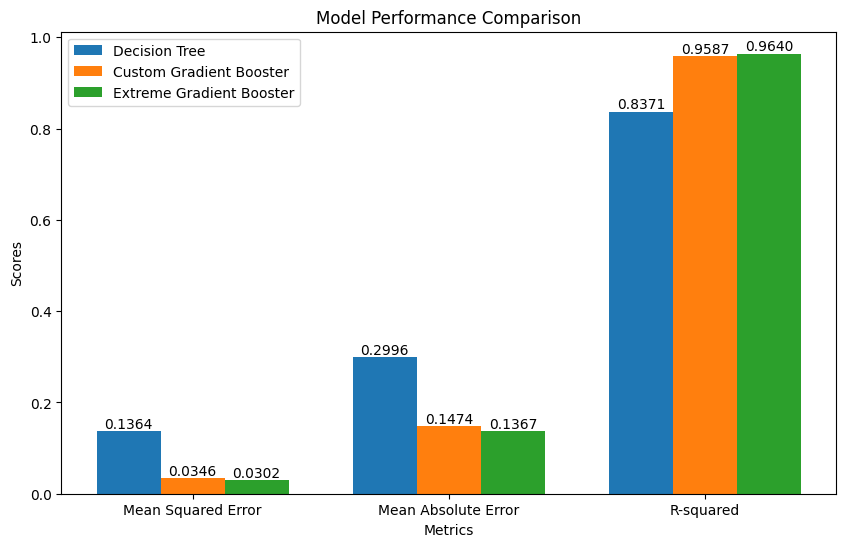

In [6]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']
dt_scores = [mse_dt, mae_dt, r2_dt]
gbm_scores = [mse_gbm, mae_gbm, r2_gbm]
xgb_scores = [mse_xgb, mae_xgb, r2_xgb]

# Set up the bar chart parameters
x = np.arange(len(metrics))
width = 0.25  # Adjust the width to fit three bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, dt_scores, width, label='Decision Tree')
bars2 = ax.bar(x, gbm_scores, width, label='Custom Gradient Booster')
bars3 = ax.bar(x + width, xgb_scores, width, label='Extreme Gradient Booster')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of each bar
for bar in bars1 + bars2 + bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.show()


In [ ]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np
import pandas as pd
import threading  # For running prediction in a separate thread

# Load the trained models
decision_tree_model = joblib.load('decision_tree_model.pkl')
gradient_booster_model = joblib.load('gradient_booster_model.pkl')

def predict_gpa():
    try:
        # Get inputs from GUI and strip any whitespace
        study_time = float(study_hours_entry.get().strip())  # StudyTimeWeekly
        absences = int(attendance_entry.get().strip())  # Absences
        extracurricular = int(extra_curricular_entry.get().strip())  # Extracurricular
        parental_support = int(family_income_entry.get().strip())  # ParentalSupport
        tutoring = int(health_status_entry.get().strip())  # Tutoring
        gender = int(gender_entry.get().strip())  # Gender (assuming user provides 0 or 1)
        ethnicity = int(ethnicity_entry.get().strip())  # Ethnicity (assuming user provides integer)
        parental_education = int(parental_education_entry.get().strip())  # ParentalEducation
        sports = int(sports_entry.get().strip())  # Sports
        music = int(music_entry.get().strip())  # Music
        volunteering = int(volunteering_entry.get().strip())  # Volunteering

        # Prepare input for prediction as a DataFrame with all expected features
        input_data = pd.DataFrame([{
            'Age': 18,  # Default value for Age (can be set or provided by user in GUI)
            'Gender': gender,
            'Ethnicity': ethnicity,
            'ParentalEducation': parental_education,
            'StudyTimeWeekly': study_time,
            'Absences': absences,
            'Tutoring': tutoring,
            'ParentalSupport': parental_support,
            'Extracurricular': extracurricular,
            'Sports': sports,
            'Music': music,
            'Volunteering': volunteering
        }])

        # Predict using selected model
        if model_var.get() == "Decision Tree":
            prediction = decision_tree_model.predict(input_data)[0]
        elif model_var.get() == "Gradient Booster":
            prediction = gradient_booster_model.predict(input_data)[0]
        else:
            messagebox.showwarning("Input Error", "Please select a valid model for prediction.")
            return

        # Display the result
        messagebox.showinfo("Prediction", f"Predicted GPA: {prediction:.2f}")

    except ValueError as e:
        print(f"Error: {e}")  # Debugging line to see what might be causing the ValueError
        messagebox.showwarning("Input Error", "Please enter valid numerical values.")

# Function to run the prediction in a separate thread
def run_prediction_thread():
    threading.Thread(target=predict_gpa).start()

# Creating the GUI
root = tk.Tk()
root.title("GPA Prediction")

# Study Hours
study_hours_label = tk.Label(root, text="Study Hours:")
study_hours_label.grid(row=0, column=0, padx=10, pady=10)
study_hours_entry = tk.Entry(root)
study_hours_entry.grid(row=0, column=1, padx=10, pady=10)

# Attendance Percentage
attendance_label = tk.Label(root, text="Absences:")
attendance_label.grid(row=1, column=0, padx=10, pady=10)
attendance_entry = tk.Entry(root)
attendance_entry.grid(row=1, column=1, padx=10, pady=10)

# Extra Curricular Activities Score
extra_curricular_label = tk.Label(root, text="Extra Curricular (0 or 1):")
extra_curricular_label.grid(row=2, column=0, padx=10, pady=10)
extra_curricular_entry = tk.Entry(root)
extra_curricular_entry.grid(row=2, column=1, padx=10, pady=10)

# Family Income (Parental Support)
family_income_label = tk.Label(root, text="Parental Support (0 or 1):")
family_income_label.grid(row=3, column=0, padx=10, pady=10)
family_income_entry = tk.Entry(root)
family_income_entry.grid(row=3, column=1, padx=10, pady=10)

# Health Status (Tutoring)
health_status_label = tk.Label(root, text="Tutoring (0 or 1):")
health_status_label.grid(row=4, column=0, padx=10, pady=10)
health_status_entry = tk.Entry(root)
health_status_entry.grid(row=4, column=1, padx=10, pady=10)

# Gender
gender_label = tk.Label(root, text="Gender (0: Male, 1: Female):")
gender_label.grid(row=5, column=0, padx=10, pady=10)
gender_entry = tk.Entry(root)
gender_entry.grid(row=5, column=1, padx=10, pady=10)

# Ethnicity
ethnicity_label = tk.Label(root, text="Ethnicity (0,1,2,3):")
ethnicity_label.grid(row=6, column=0, padx=10, pady=10)
ethnicity_entry = tk.Entry(root)
ethnicity_entry.grid(row=6, column=1, padx=10, pady=10)

# Parental Education
parental_education_label = tk.Label(root, text="Parental Education (0,1,2,3,4):")
parental_education_label.grid(row=7, column=0, padx=10, pady=10)
parental_education_entry = tk.Entry(root)
parental_education_entry.grid(row=7, column=1, padx=10, pady=10)

# Sports
sports_label = tk.Label(root, text="Sports (0 or 1):")
sports_label.grid(row=8, column=0, padx=10, pady=10)
sports_entry = tk.Entry(root)
sports_entry.grid(row=8, column=1, padx=10, pady=10)

# Music
music_label = tk.Label(root, text="Music (0 or 1):")
music_label.grid(row=9, column=0, padx=10, pady=10)
music_entry = tk.Entry(root)
music_entry.grid(row=9, column=1, padx=10, pady=10)

# Volunteering
volunteering_label = tk.Label(root, text="Volunteering (0 or 1):")
volunteering_label.grid(row=10, column=0, padx=10, pady=10)
volunteering_entry = tk.Entry(root)
volunteering_entry.grid(row=10, column=1, padx=10, pady=10)

# Model Selection
model_var = tk.StringVar(value="Decision Tree")
decision_tree_radio = tk.Radiobutton(root, text="Decision Tree", variable=model_var, value="Decision Tree")
decision_tree_radio.grid(row=11, column=0, padx=10, pady=10)
gradient_booster_radio = tk.Radiobutton(root, text="Gradient Booster", variable=model_var, value="Gradient Booster")
gradient_booster_radio.grid(row=11, column=1, padx=10, pady=10)

# Predict Button
predict_button = tk.Button(root, text="Predict GPA", command=run_prediction_thread)  # Call thread function
predict_button.grid(row=12, column=0, columnspan=2, pady=20)

root.mainloop()
